In [10]:
# Import stuff

import scipy.io
import os.path
import sys

%pylab inline

import matplotlib.gridspec as gridspec

from mne.viz import circular_layout
import itertools

from matplotlib.backends.backend_pdf import PdfPages



Populating the interactive namespace from numpy and matplotlib


In [11]:
# Define stuff

def mln_read_mlnMat(filename):
    matdata = scipy.io.loadmat(filename)
    mlnMat=matdata['mlnMat']
    para=matdata['para'][0][0]
    return mlnMat, para

def mln_fmlnMat(nc, filename):
    mlnMat,para=mln_read_mlnMat(filename)
    methodlog=para['methodlog']
    theta=para['theta']
    #fmlnMat=np.zeros([nc,nc])    
    thetamlnMat=mlnMat
    for iboot in np.arange(20):
        imlnMat=mlnMat[:,:,iboot]
        ithethod=para['theta'][iboot]
        imlnMat[imlnMat<ithethod[0]]=0
        imlnMat[imlnMat>=ithethod[1]]=2
        imlnMat[(imlnMat>=ithethod[0])*(imlnMat<ithethod[1])]=1
        thetamlnMat[:,:,iboot]=imlnMat
    imdMat=np.median(thetamlnMat,axis=2)
    imdMat[imdMat<0.6]=0.
    return imdMat

def mln_read_listlink(dfilename):
    timedata = scipy.io.loadmat(dfilename)
    Params=timedata['Params']
    #para=matdata['para'][0][0]
    iliststr=Params['str'][:][0][0][0]
    #ilistlink=[(iliststr[inode][0][0],iliststr[jnode][0][0]) for inode in np.arange(nc) for jnode in np.arange(nc)]
    return iliststr

/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b12
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b13
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b14
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b15
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b16
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b23
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b24
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b25
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b26
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data

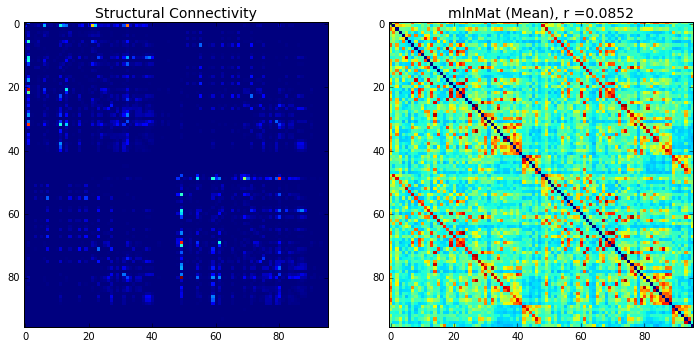

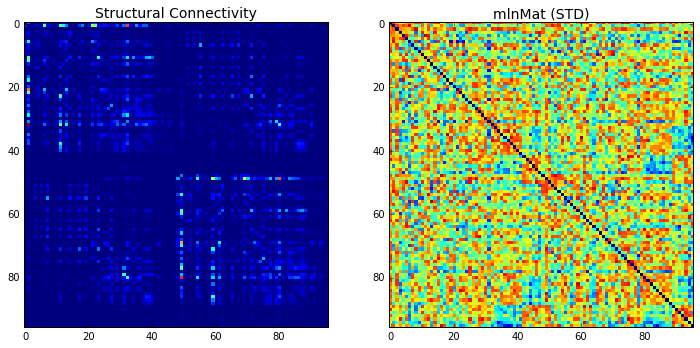

/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b12
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b13
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b14
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b15
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b16
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b23
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b24
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b25
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b26
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data

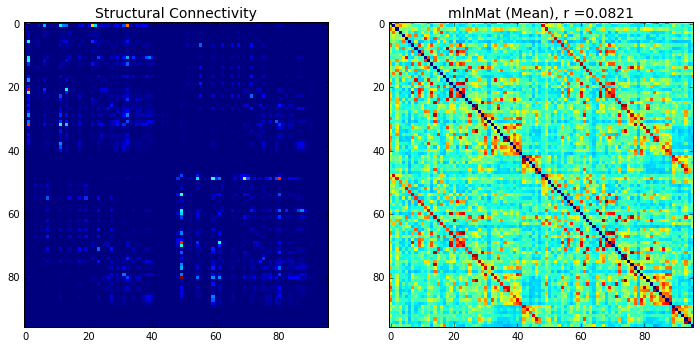

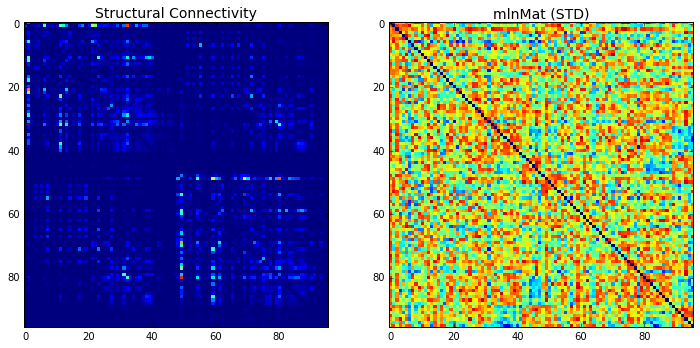

/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b12
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b13
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b14
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b15
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b16
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b23
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b24
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b25
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data/29177b26
/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/hidden/data

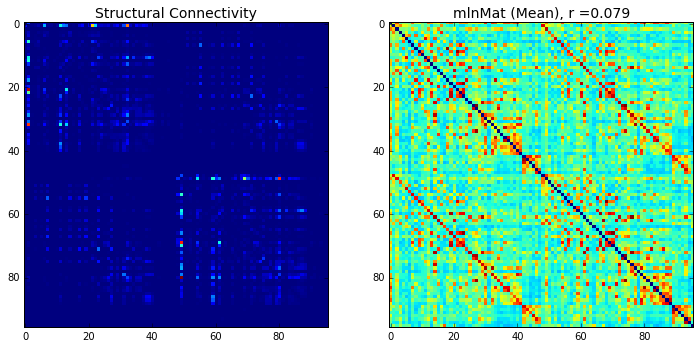

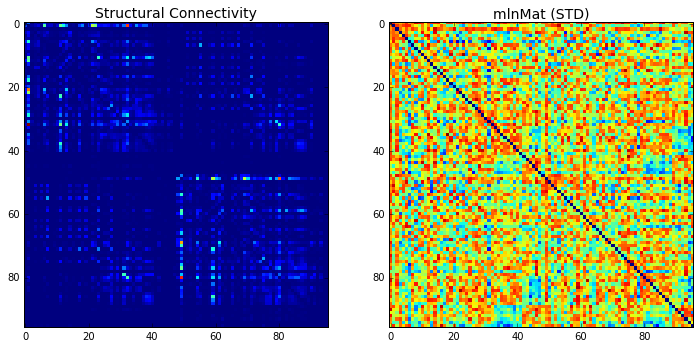

In [12]:
# Create pdfs (massive for loop!)

## Things to change for BMs vs. MUL:
    # toutfile: Tout --> Adp, FRN_G1_tak
    # pdf: MUL_
    # scipy.io.savemat: MUL_ or _MUL (x3)
    # bm: mlnMat

basicrawdir='/Users/AmandaE/Documents/MATLAB/projects/mulan_files/mlnData/fc_abide_jan20_sub/' # folder names
outdir = basicrawdir+'vizresults/'
if not os.path.isdir(outdir): os.makedirs(outdir)

iwins = ['50', '70', '90']
datasets = np.loadtxt('subjlist.txt')
# bm = ['BCorrU','BCorrD', 'BCohF','BTED']
bm = ['mlnMat']
nchan=96

allR = np.zeros((np.shape(iwins)[0],np.shape(bm)[0]))
nmat = scipy.io.loadmat('nmat96.mat') # loads Nlink matrix for 96 nodes
nmat = nmat['nmat']


for w in range(np.shape(iwins)[0]):

    pdf=PdfPages(outdir + 'MUL_avg_sub_Win' + iwins[w] + '.pdf') 

    for i in range(np.shape(bm)[0]):
        
        avgsim = np.zeros((nchan,nchan,np.shape(datasets)[0]))
        avgsc = np.zeros((nchan,nchan,np.shape(datasets)[0]))

        for s in range(np.shape(datasets)[0]):

            basicdir=basicrawdir+'hidden/'
            Toutdir=basicdir+'Win'+str(iwins[w])+'/ToutResults/'
            
            N28fMat=[]
            listlinkall=[]
            
            for inbgv,bgv in enumerate(itertools.combinations(np.arange(6)+1,2)):
                addname='b'+str(bgv[0])+str(bgv[1])
                Toutdir=basicdir+'Win'+str(iwins[w])+'/ToutResults/'
                prename=str(int(datasets[s]))+addname

                # toutfile='Tout_'+str(iwins[w])+'_'+prename+'.mat'
                toutfile='Adp_'+str(iwins[w])+'_'+prename+'FRN_G1_tak.mat'
                id_datasets=str(int(datasets[s]))+addname
                filename=Toutdir+toutfile

                matdata = scipy.io.loadmat(filename)
                cdata = matdata[bm[i]]
                ifMat = np.absolute(np.mean(cdata,axis=2))
                del cdata

                #ib_labelname=[labelname[indch] for indch in ilistCa]
                dfilename=basicdir+'data/'+id_datasets
                print(dfilename)
                iliststr = mln_read_listlink(dfilename)
                ifMatO=np.zeros([nchan,nchan])
                for iind, inode in enumerate(iliststr):
                    for jind,jnode in enumerate(iliststr):
                        ifMatO[inode-1,jnode-1]=ifMat[iind,jind]
                        listlinkall.append((iliststr[iind][0][0],iliststr[jind][0][0]))
                N28fMat.append(ifMatO)

            N28fMat = np.array(N28fMat) # replaces code in next cell
            fNchanMat = np.zeros([nchan,nchan])
            ifjMatSum=[N28fMat[isub,:,:] for isub in np.arange(15)]
            ifjMatSum = np.array(ifjMatSum)
            fNchanMat[:,:]=np.divide(np.sum(ifjMatSum,0),nmat)

            hidata = scipy.io.loadmat(basicrawdir+'data/'+str(int(datasets[s]))+'.mat')
            sc=hidata['Connectivity']
            
            avgsc[:,:,s] = sc
            avgsim[:,:,s] = fNchanMat

            # scipy.io.savemat(Toutdir+'Int_'+str(int(datasets[s]))+'.mat',{'fNchanMat':fNchanMat,'N28fMat':N28fMat,'sc':sc})
        
        sc = np.mean(avgsc,axis=2)
        cdata = np.mean(avgsim,axis=2)
        # scipy.io.savemat(outdir+'avg_mean_Win'+iwins[w]+'_'+bm[i]+'.mat',mdict={'sc':sc,'cdata':cdata})
        scipy.io.savemat(outdir+'MUL_avg_mean_Win'+iwins[w]+'_'+bm[i]+'.mat',mdict={'sc':sc,'cdata':cdata})

        fig = figure(figsize = (12, 6))

        ax1=subplot(121);
        plt.imshow(sc,interpolation='nearest');
        plt.title('Structural Connectivity',fontsize=14);

        ax1=subplot(122);
        plt.imshow(cdata,interpolation='nearest');

        scv = sc;
        for r in range(scv.shape[0]):
                scv[r:,r]=numpy.inf
        scv = scv[~numpy.isinf(scv)]

        cdatav = cdata;
        for r in range(cdatav.shape[0]):
            cdatav[r:,r]=numpy.inf
        cdatav = cdatav[~numpy.isinf(cdatav)]

        r = corrcoef(scv.ravel(), cdatav.ravel())[1, 0]
        r = round(r,4)
        allR[w,i] = r;
        r = str(r)

        plt.title(bm[i] + ' (Mean), r =' + r, fontsize=14);

        pdf.savefig(fig)
        plt.show()
        
        sc = np.std(avgsc,axis=2)
        cdata = np.std(avgsim,axis=2)
        # scipy.io.savemat(outdir+'avg_std_Win'+iwins[w]+'_'+bm[i]+'.mat',mdict={'sc':sc,'cdata':cdata})
        scipy.io.savemat(outdir+'MUL_avg_std_Win'+iwins[w]+'_'+bm[i]+'.mat',mdict={'sc':sc,'cdata':cdata})

        fig = figure(figsize = (12, 6))

        ax1=subplot(121);
        plt.imshow(sc,interpolation='nearest');
        plt.title('Structural Connectivity',fontsize=14);

        ax1=subplot(122);
        plt.imshow(cdata,interpolation='nearest');
        plt.title(bm[i] + ' (STD)', fontsize=14);

        pdf.savefig(fig)
        plt.show()

    pdf.close()

In [13]:
# scipy.io.savemat(basicrawdir+'allR_avg_sub.mat',mdict={'allR':allR})
scipy.io.savemat(basicrawdir+'allR_avg_sub_MUL.mat',mdict={'allR':allR})

In [ ]:
# ran this once to produce nmat: 96x96 matrix with Nlink values
# nmat is the same for all participants- saves a ton of computation time

for inode in np.arange(nchan):
    for jnode in np.arange(nchan):
        Nlink=listlinkall.count((inode+1,jnode+1))
        ijfMatSum=[N28fMat[isub][inode][jnode] for isub in np.arange(15)]
        fNchanMat[inode,jnode]=np.sum(ijfMatSum)/Nlink 